*Python Machine Learning 3rd Edition* by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2019

Code Repository: https://github.com/rasbt/python-machine-learning-book-3rd-edition

Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/LICENSE.txt)

# Python Machine Learning - Code Examples

# Chapter 3 - A Tour of Machine Learning Classifiers Using Scikit-Learn

Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [5]:
# %load_ext watermark
# %watermark -a "Sebastian Raschka" -u -d -p numpy,pandas,matplotlib,sklearn

*The use of `watermark` is optional. You can install this Jupyter extension via*  

    conda install watermark -c conda-forge  

or  

    pip install watermark   

*For more information, please see: https://github.com/rasbt/watermark.*

### Overview

- [Choosing a classification algorithm](#Choosing-a-classification-algorithm)
- [First steps with scikit-learn](#First-steps-with-scikit-learn)
    - [Training a perceptron via scikit-learn](#Training-a-perceptron-via-scikit-learn)
- [Modeling class probabilities via logistic regression](#Modeling-class-probabilities-via-logistic-regression)
    - [Logistic regression intuition and conditional probabilities](#Logistic-regression-intuition-and-conditional-probabilities)
    - [Learning the weights of the logistic cost function](#Learning-the-weights-of-the-logistic-cost-function)
    - [Training a logistic regression model with scikit-learn](#Training-a-logistic-regression-model-with-scikit-learn)
    - [Tackling overfitting via regularization](#Tackling-overfitting-via-regularization)
- [Maximum margin classification with support vector machines](#Maximum-margin-classification-with-support-vector-machines)
    - [Maximum margin intuition](#Maximum-margin-intuition)
    - [Dealing with the nonlinearly separable case using slack variables](#Dealing-with-the-nonlinearly-separable-case-using-slack-variables)
    - [Alternative implementations in scikit-learn](#Alternative-implementations-in-scikit-learn)
- [Solving nonlinear problems using a kernel SVM](#Solving-nonlinear-problems-using-a-kernel-SVM)
    - [Using the kernel trick to find separating hyperplanes in higher dimensional space](#Using-the-kernel-trick-to-find-separating-hyperplanes-in-higher-dimensional-space)
- [Decision tree learning](#Decision-tree-learning)
    - [Maximizing information gain – getting the most bang for the buck](#Maximizing-information-gain-–-getting-the-most-bang-for-the-buck)
    - [Building a decision tree](#Building-a-decision-tree)
    - [Combining weak to strong learners via random forests](#Combining-weak-to-strong-learners-via-random-forests)
- [K-nearest neighbors – a lazy learning algorithm](#K-nearest-neighbors-–-a-lazy-learning-algorithm)
- [Summary](#Summary)

<br>
<br>

<br>
<br>

In [45]:
from IPython.display import Image
%matplotlib inline

# Choosing a classification algorithm

...

# First steps with scikit-learn

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower examples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [1]:
import numpy as np
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(
    precision=4,
    formatter={'float': '{: 1.2f}'.format}  # ширина 8, 4 знака после запятой
)


In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))
print("Ключи iris_dataset: {}".format(iris.keys()))
print("Названия ответов: {}".format(iris['target_names']))
print("Названия признаков: {}".format(iris['feature_names']))

Class labels: [0 1 2]
Ключи iris_dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Названия ответов: ['setosa' 'versicolor' 'virginica']
Названия признаков: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
iris.data[:5]

array([[ 5.10,  3.50,  1.40,  0.20],
       [ 4.90,  3.00,  1.40,  0.20],
       [ 4.70,  3.20,  1.30,  0.20],
       [ 4.60,  3.10,  1.50,  0.20],
       [ 5.00,  3.60,  1.40,  0.20]])

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Splitting data into 70% training and 30% test data:

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1,
    stratify=y # такое же соотношение классов в обучающем и тестовом наборе как и в исходном
)

In [7]:
print('Labels count in y:', np.bincount(y)) # количество вхождений каждого элемента в массиве
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


Standardizing the features:

In [8]:
X_train[:5]

array([[ 1.40,  0.20],
       [ 1.70,  0.20],
       [ 5.30,  2.30],
       [ 5.70,  2.10],
       [ 1.20,  0.20]])

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
X_train_std[:5]

array([[-1.33, -1.31],
       [-1.17, -1.31],
       [ 0.84,  1.45],
       [ 1.07,  1.18],
       [-1.44, -1.31]])

In [11]:
# проверка результата нормализации
# среднее должно быть близко к нулю
# СКО олжно быть 1
print(np.mean(X_train_std, axis=0)) # axis=0 ось, которая должна исчезнуть
print(np.std(X_test_std, axis=0))


[ 0.00  0.00]
[ 0.93  0.99]


<br>
<br>

## Training a perceptron via scikit-learn

In [12]:
# import json
# print(json.dumps(params, indent=3, ensure_ascii=False))

def print_aligned_dict(data, indent=0):
    """Красивый вывод словаря с выравниванием ключей (без скобок и запятых)"""
    if not data:
        return

    # Находим максимальную длину ключа (с учётом кавычек)
    max_key_len = max(len(f'"{key}"') for key in data.keys())

    items = list(data.items())

    for i, (key, value) in enumerate(items):
        # Форматируем значение в JSON-стиле
        if value is None:
            val_str = "null"
        elif value is True:
            val_str = "true"
        elif value is False:
            val_str = "false"
        elif isinstance(value, str):
            val_str = f'{value}'
        else:
            val_str = str(value)

        # Ключ с кавычками
        key_str = f'{key}'

        # Вычисляем отступ для выравнивания
        padding = ' ' * (max_key_len - len(key_str))

        # Печатаем строку (без запятой)
        print(f'{padding}{key_str}: {val_str}')

In [13]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(
    eta0=0.1,
    random_state=1
  )
ppn.fit(X_train_std, y_train)

print_aligned_dict(ppn.get_params())

                alpha: 0.0001
         class_weight: null
       early_stopping: false
                 eta0: 0.1
        fit_intercept: true
             l1_ratio: 0.15
             max_iter: 1000
     n_iter_no_change: 5
               n_jobs: null
              penalty: null
         random_state: 1
              shuffle: true
                  tol: 0.001
  validation_fraction: 0.1
              verbose: 0
           warm_start: false


**Note**

- You can replace `Perceptron(n_iter, ...)` by `Perceptron(max_iter, ...)` in scikit-learn >= 0.19. The `n_iter` parameter is used here deliberately, because some people still use scikit-learn 0.18.

In [14]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [15]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [16]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


In [17]:
help( Perceptron)

Help on class Perceptron in module sklearn.linear_model._perceptron:

class Perceptron(sklearn.linear_model._stochastic_gradient.BaseSGDClassifier)
 |  Perceptron(*, penalty=None, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)
 |
 |  Linear perceptron classifier.
 |
 |  The implementation is a wrapper around :class:`~sklearn.linear_model.SGDClassifier`
 |  by fixing the `loss` and `learning_rate` parameters as::
 |
 |      SGDClassifier(loss="perceptron", learning_rate="constant")
 |
 |  Other available parameters are described below and are forwarded to
 |  :class:`~sklearn.linear_model.SGDClassifier`.
 |
 |  Read more in the :ref:`User Guide <perceptron>`.
 |
 |  Parameters
 |  ----------
 |
 |  penalty : {'l2','l1','elasticnet'}, default=None
 |      The penalty (aka regularization term) to

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]


        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100,
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100,
                        label='test set')

Training a perceptron model using the standardized training data:

/tmp/ipython-input-251/1601950096.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/tmp/ipython-input-251/1601950096.py:42: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


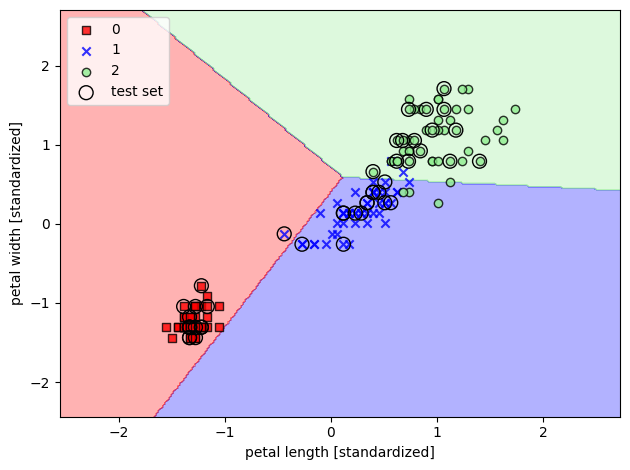

In [19]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

<br>
<br>

# Modeling class probabilities via logistic regression

...

### Logistic regression intuition and conditional probabilities

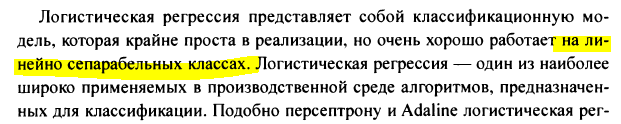

<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-251/818546493.py:15: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi (z)$')


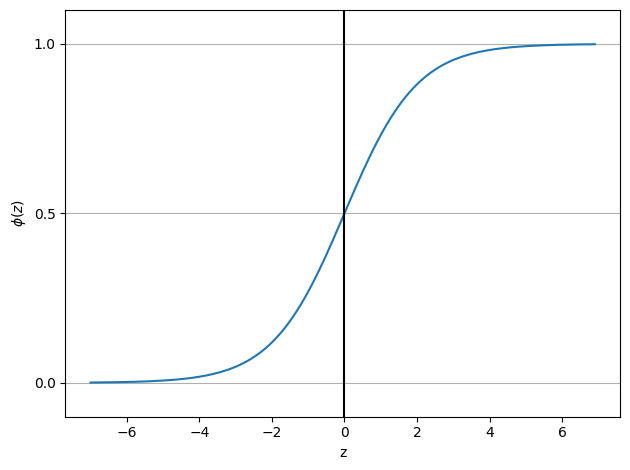

In [20]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

In [27]:
# Image(filename='images/03_03.png', width=500)

FileNotFoundError: [Errno 2] No such file or directory: 'images/03_03.png'

<br>
<br>

### Learning the weights of the logistic cost function

<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-251/4239572035.py:19: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('$\phi$(z)')


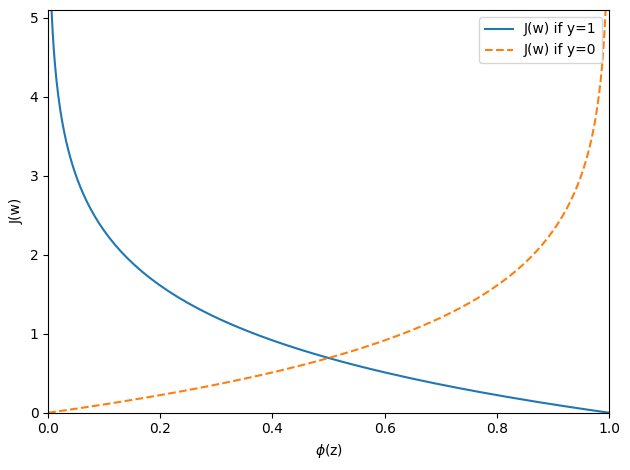

In [21]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_04.png', dpi=300)
plt.show()

In [22]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Logistic cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

<br>
<br>

/tmp/ipython-input-251/1601950096.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


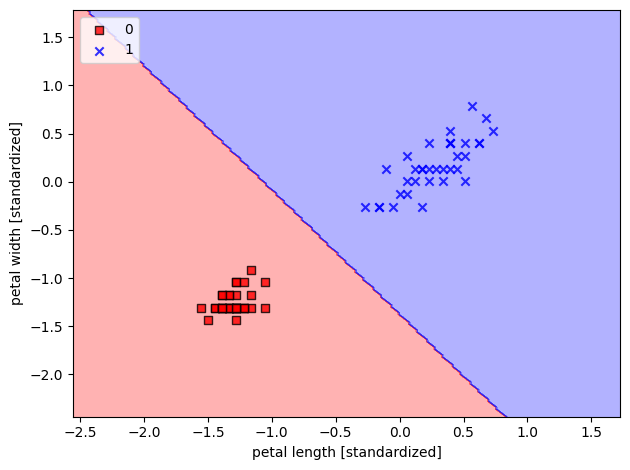

In [23]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_05.png', dpi=300)
plt.show()

### Training a logistic regression model with scikit-learn

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-251/1601950096.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/tmp/ipython-input-251/1601950096.py:42: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


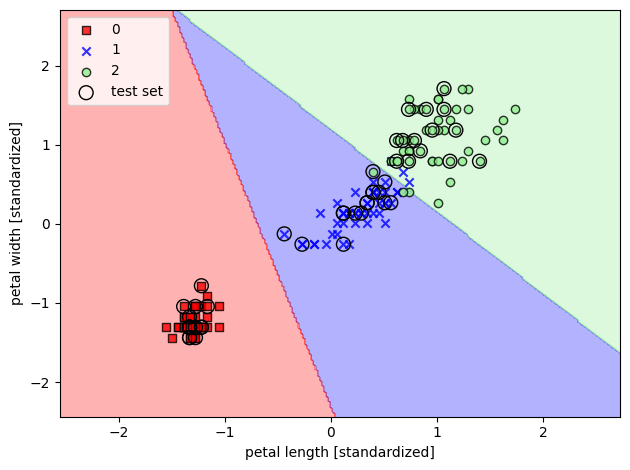

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(
    # в случае уменьшения параметра С сила регуляризации увеличивается.
    # C = 0.001 → очень сильная регуляризация → веса стремятся к 0 → простая модель
    # C = 1.0   → умеренная регуляризация (дефолт)
    # C = 100   → слабая регуляризация → модель может подстроиться под шум
    # 💡 Совет: начинайте с дефолта (penalty='l2', C=1.0), и отключайте регуляризацию только
    # если есть обоснованная причина и вы контролируете переобучение другими способами
    # (кросс-валидация, ранняя остановка и т.д.).
    C=100.0,
    random_state=1,
    solver='lbfgs',
    multi_class='ovr' # полиномиальная логистическая регрессия или OvR)
)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

In [25]:
print_aligned_dict(lr.get_params())

                  C: 100.0
       class_weight: null
               dual: false
      fit_intercept: true
  intercept_scaling: 1
           l1_ratio: null
           max_iter: 100
        multi_class: ovr
             n_jobs: null
            penalty: l2
       random_state: 1
             solver: lbfgs
                tol: 0.0001
            verbose: 0
         warm_start: false


In [26]:
lr.predict_proba(X_test_std[:3, :])

array([[ 0.00,  0.14,  0.86],
       [ 0.83,  0.17,  0.00],
       [ 0.85,  0.15,  0.00]])

In [27]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([ 1.00,  1.00,  1.00])

In [28]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [29]:
lr.predict(X_test_std[:10, :])

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0])

In [30]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

In [31]:
print(X_test_std[0, :])
print(X_test_std[0, :].reshape(1, -1))

[ 0.90  1.45]
[[ 0.90  1.45]]


<br>
<br>

### Tackling overfitting via regularization

In [ ]:
Image(filename='images/03_07.png', width=700)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

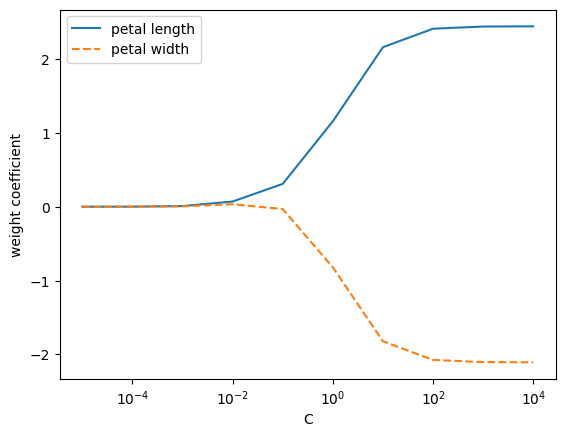

In [32]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1,
                            solver='lbfgs',
                            multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('images/03_08.png', dpi=300)
plt.show()

<br>
<br>

# Maximum margin classification with support vector machines

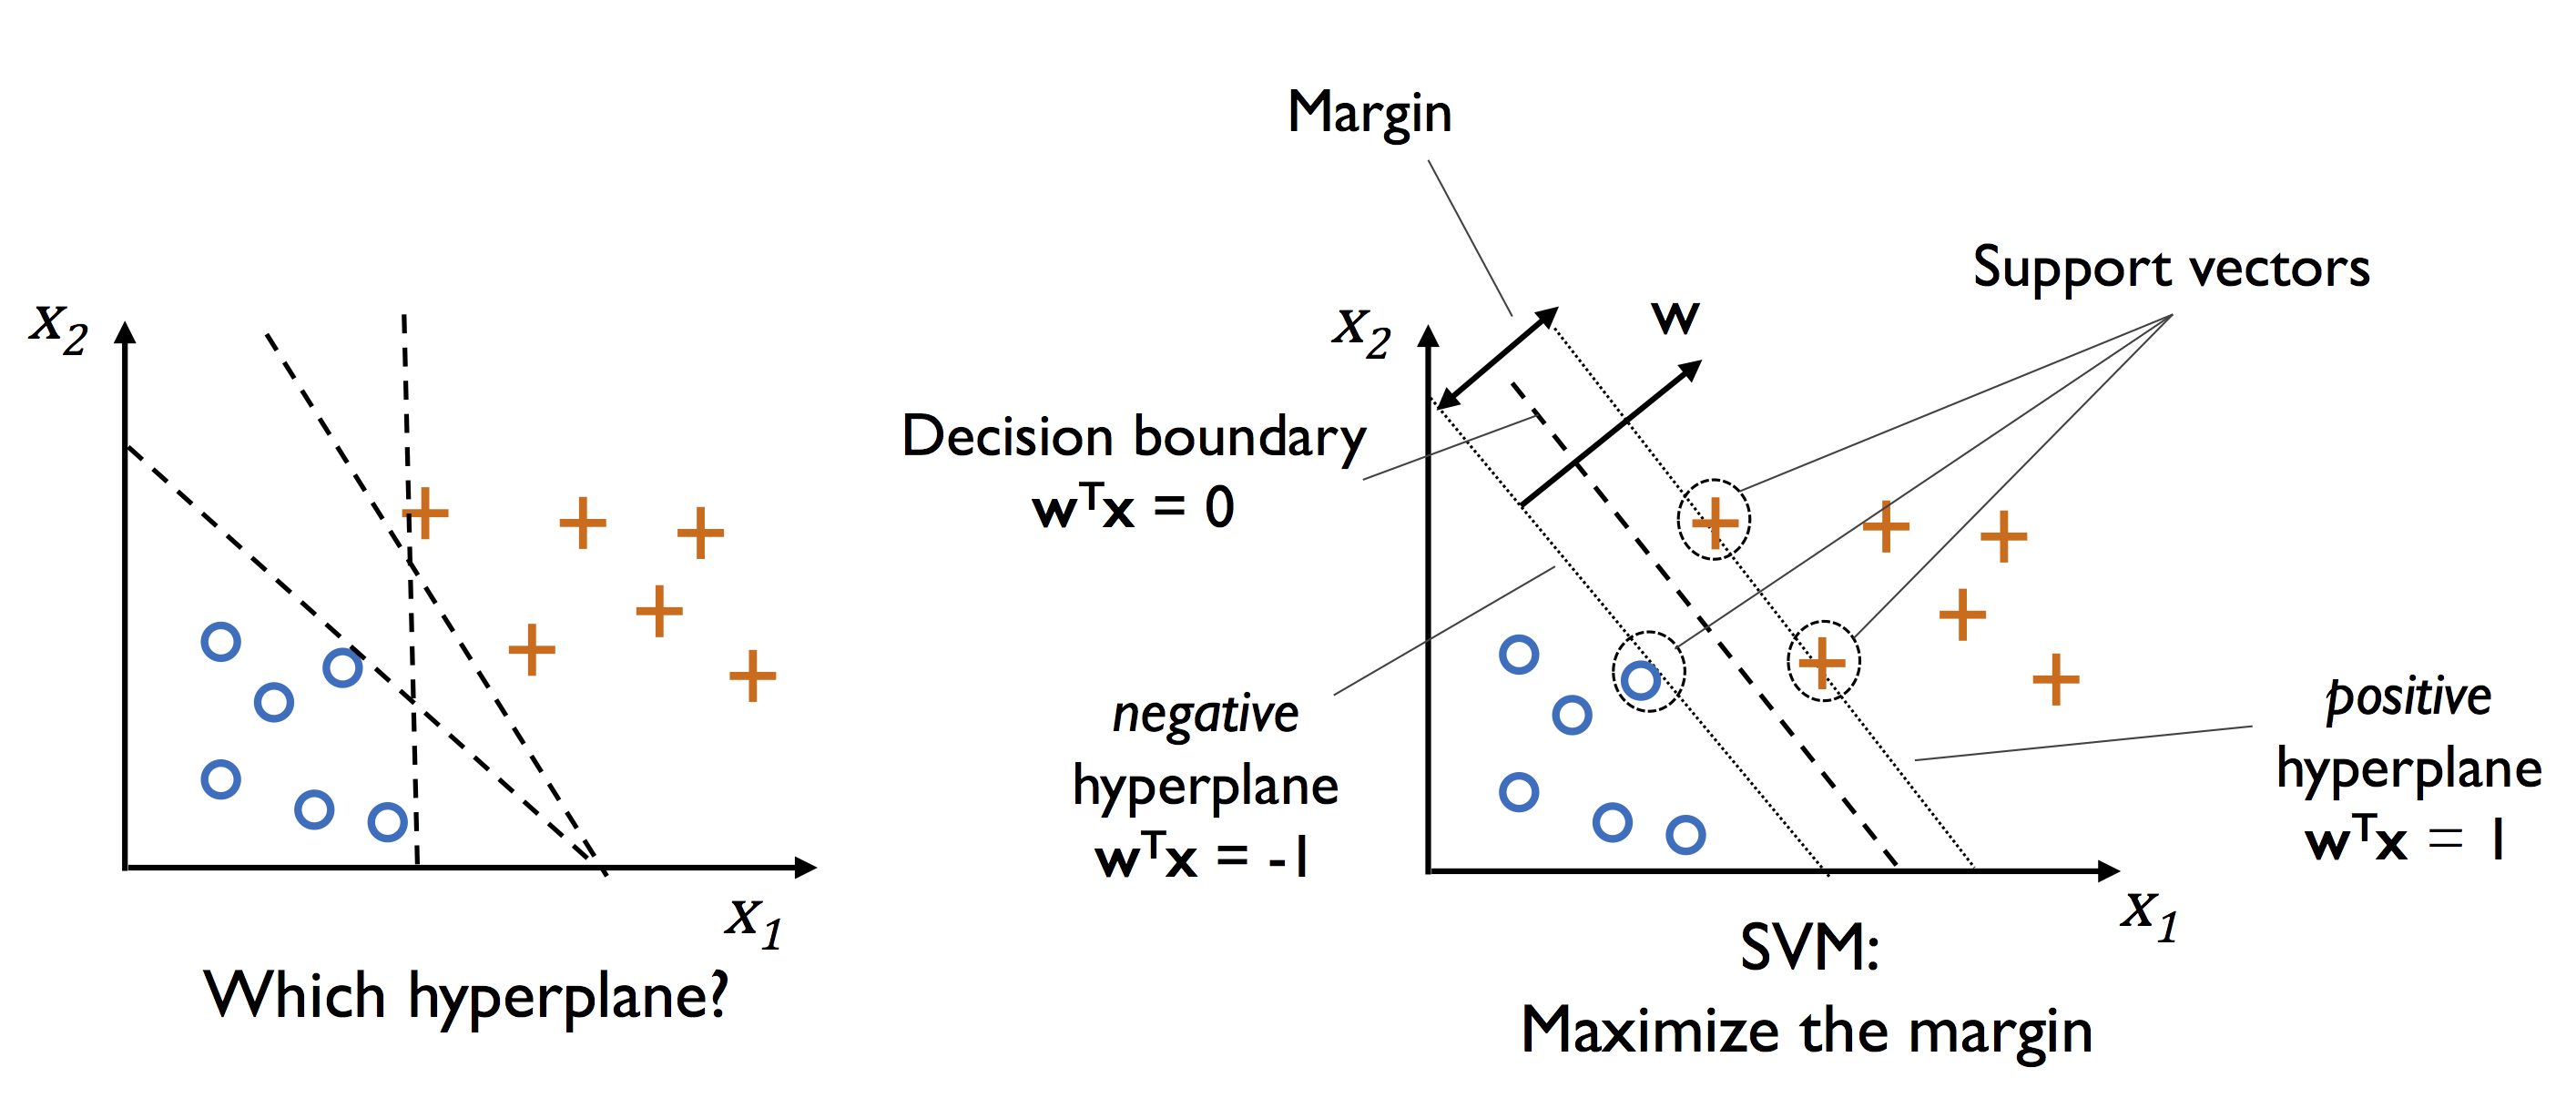

In [ ]:
# Image(filename='images/03_09.png', width=700)

## Maximum margin intuition

...

## Dealing with the nonlinearly separable case using slack variables

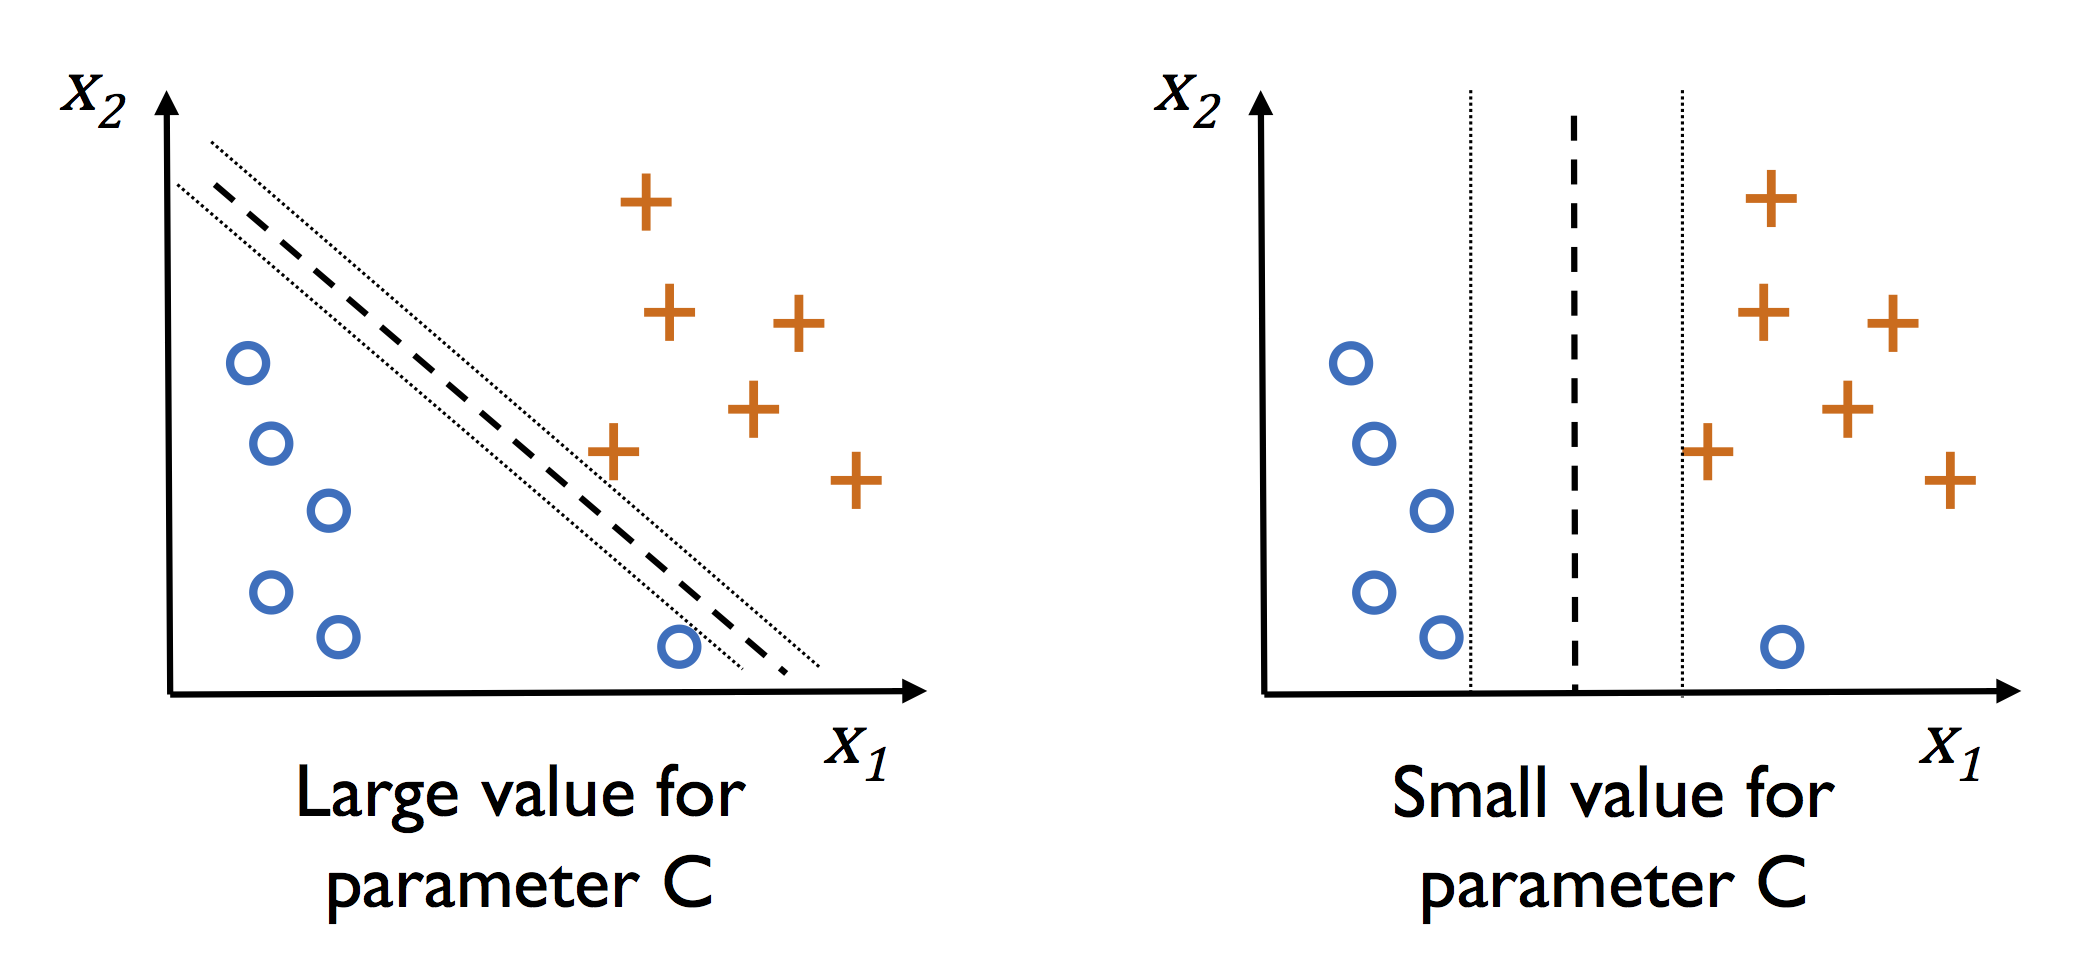

In [ ]:
Image(filename='images/03_10.png', width=600)

/tmp/ipython-input-251/1601950096.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/tmp/ipython-input-251/1601950096.py:42: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


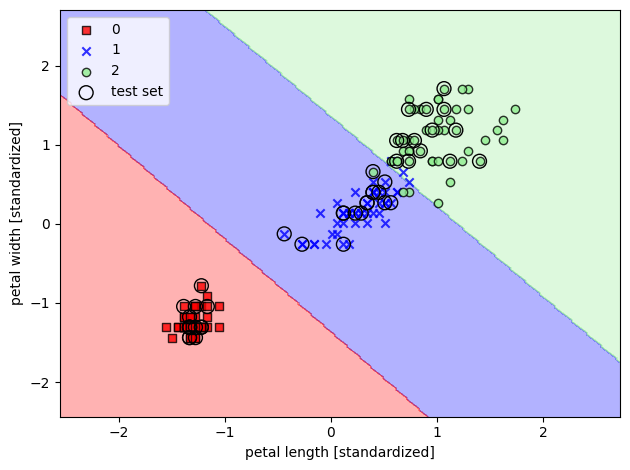

In [33]:
from sklearn.svm import SVC
svm = SVC(
    # kernel{
    #     ‘linear’,
    #     ‘poly’,
    #     ‘rbf’,
    #     ‘sigmoid’,
    #     ‘precomputed’} default=’rbf’
    kernel='linear',
    C=1.0,
    random_state=1
)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_11.png', dpi=300)
plt.show()

In [34]:
print_aligned_dict(svm.get_params())

                        C: 1.0
               break_ties: false
               cache_size: 200
             class_weight: null
                    coef0: 0.0
  decision_function_shape: ovr
                   degree: 3
                    gamma: scale
                   kernel: linear
                 max_iter: -1
              probability: false
             random_state: 1
                shrinking: true
                      tol: 0.001
                  verbose: false


## Alternative implementations in scikit-learn

In [35]:
from sklearn.linear_model import SGDClassifier

# ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
# svm = SGDClassifier(loss='hinge')
print_aligned_dict(lr.get_params())

                alpha: 0.0001
              average: false
         class_weight: null
       early_stopping: false
              epsilon: 0.1
                 eta0: 0.0
        fit_intercept: true
             l1_ratio: 0.15
        learning_rate: optimal
                 loss: log
             max_iter: 1000
     n_iter_no_change: 5
               n_jobs: null
              penalty: l2
              power_t: 0.5
         random_state: null
              shuffle: true
                  tol: 0.001
  validation_fraction: 0.1
              verbose: 0
           warm_start: false


<br>
<br>

# Solving non-linear problems using a kernel SVM

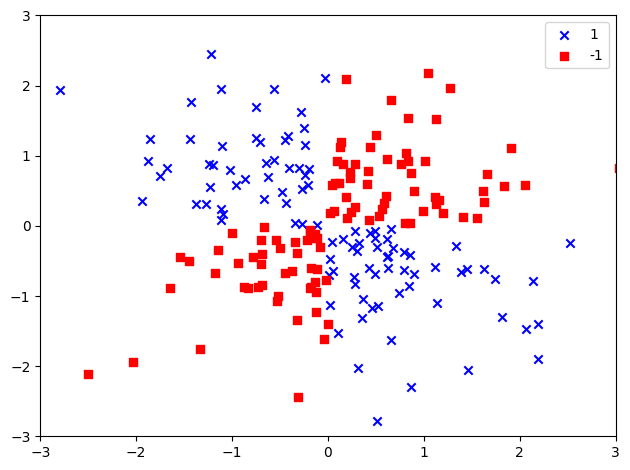

In [36]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_12.png', dpi=300)
plt.show()

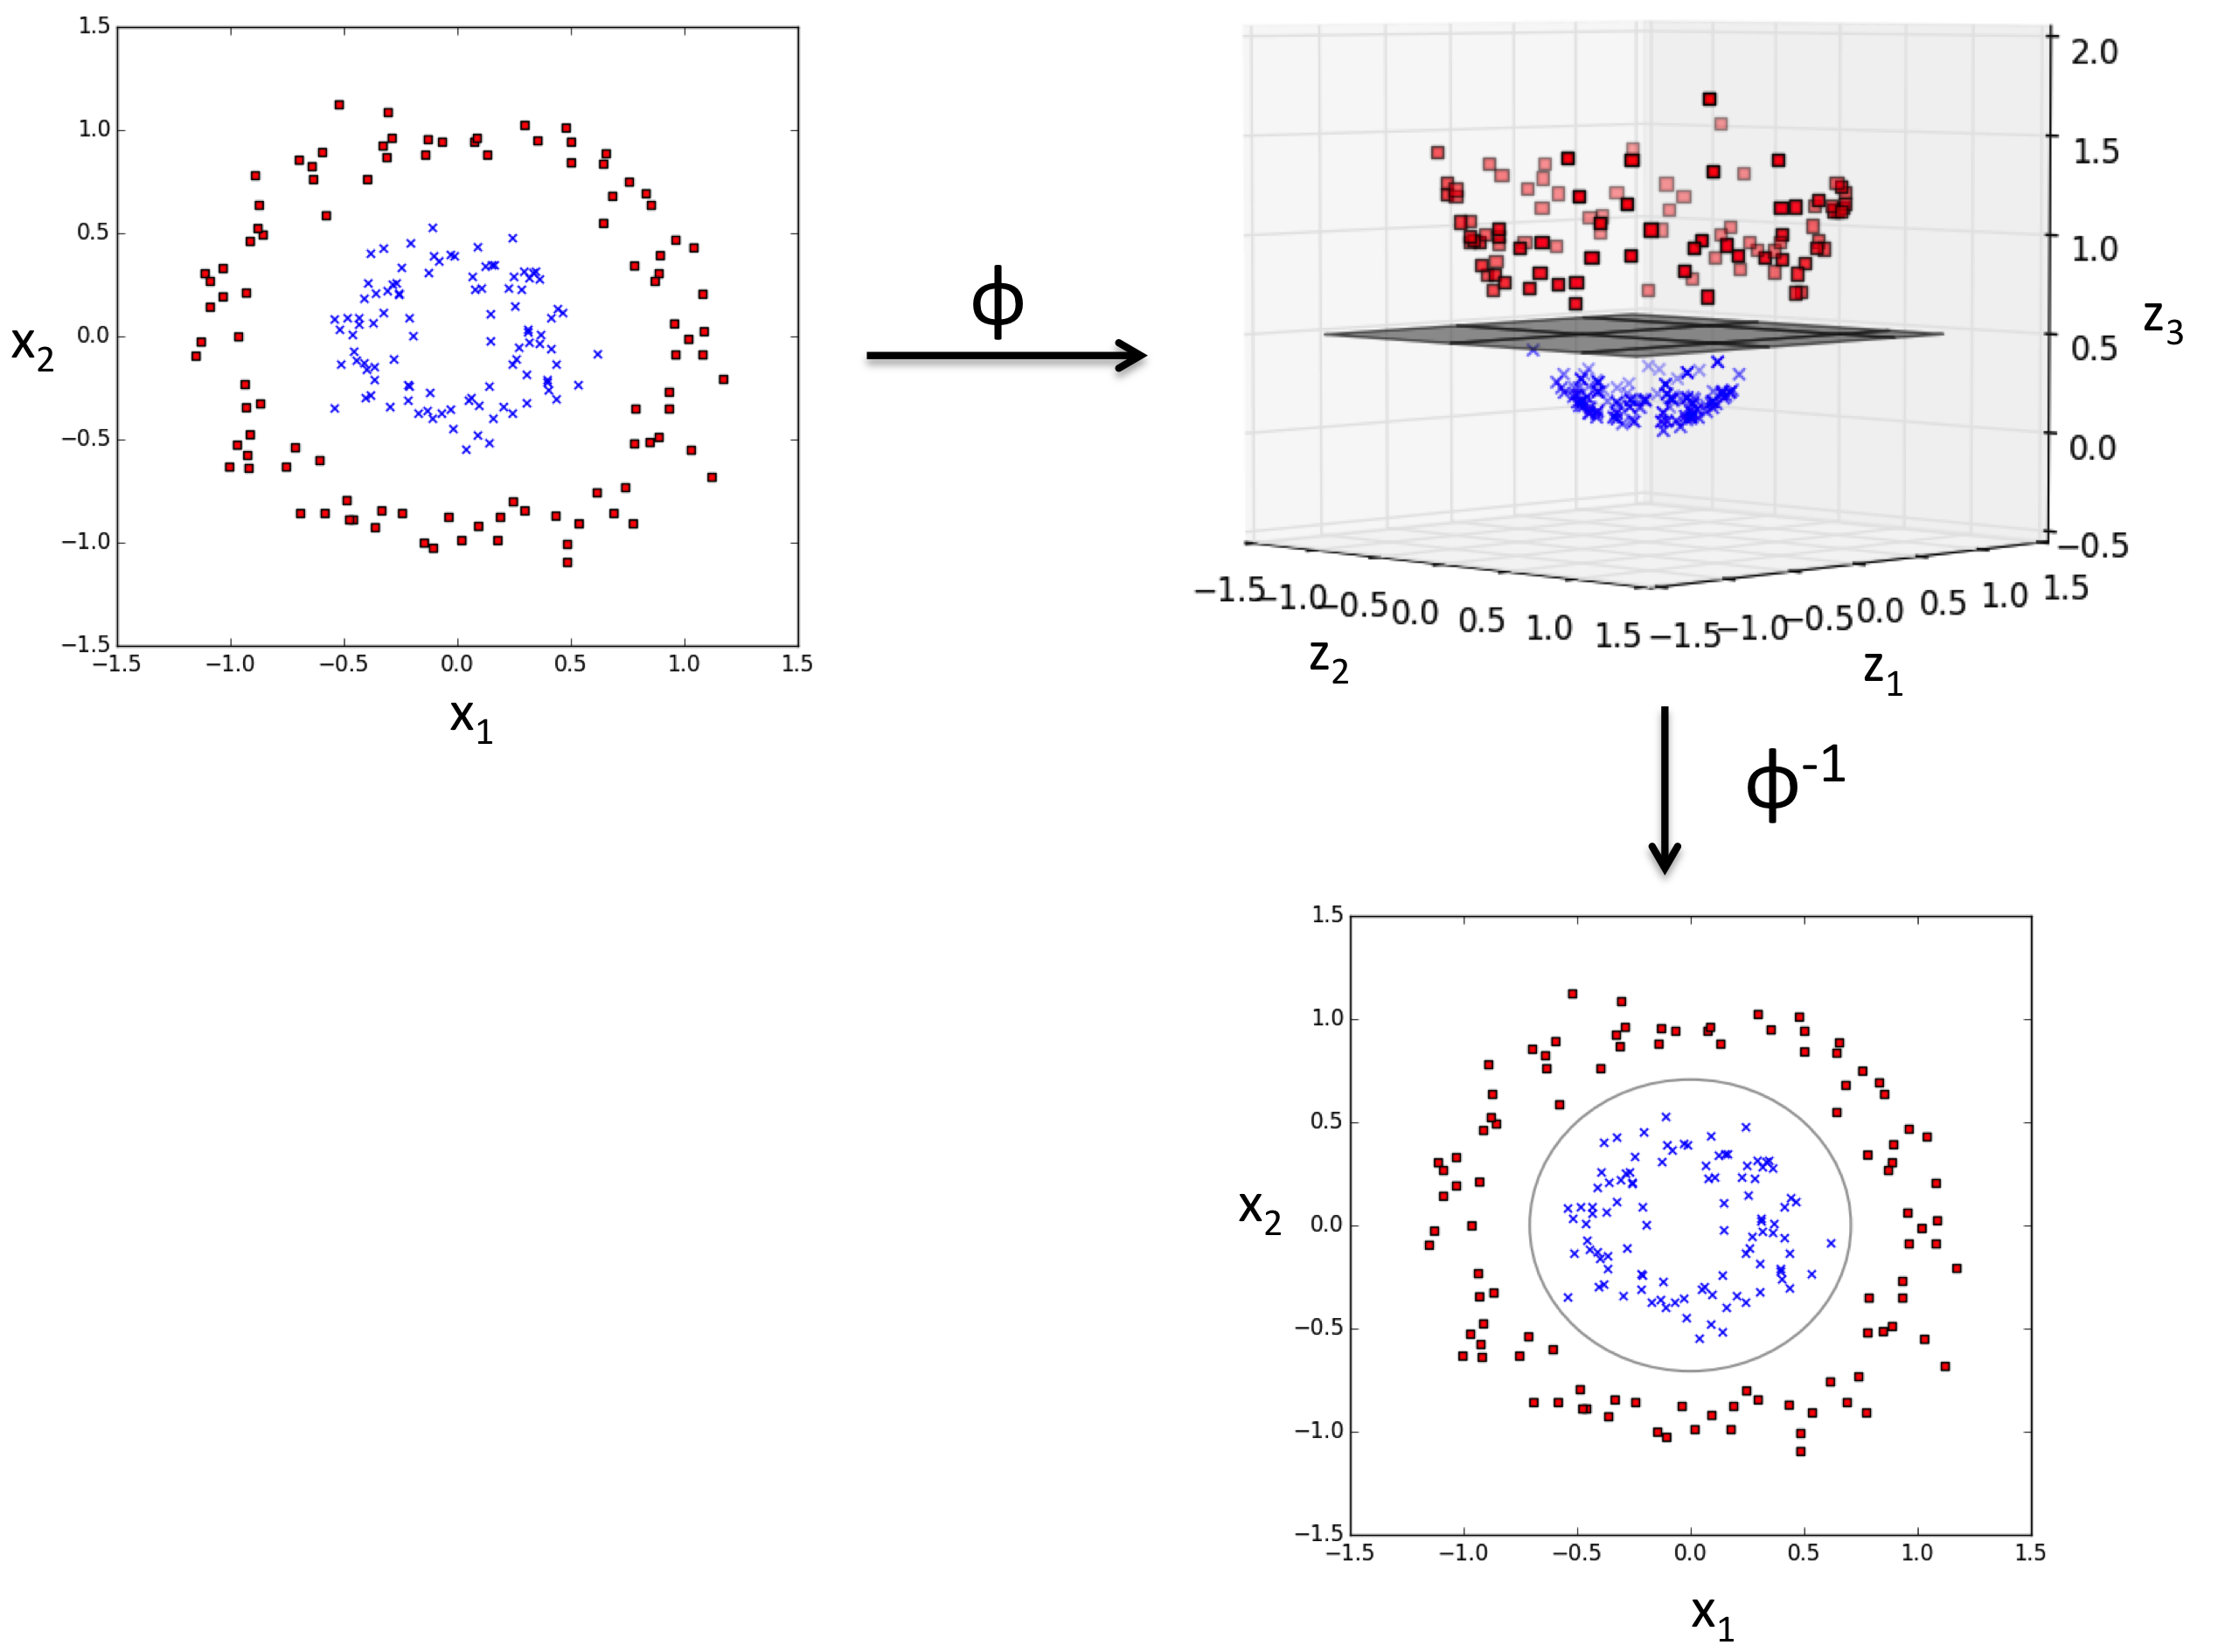

In [ ]:
Image(filename='images/03_13.png', width=700)

<br>
<br>

## Using the kernel trick to find separating hyperplanes in higher dimensional space

/tmp/ipython-input-251/1601950096.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


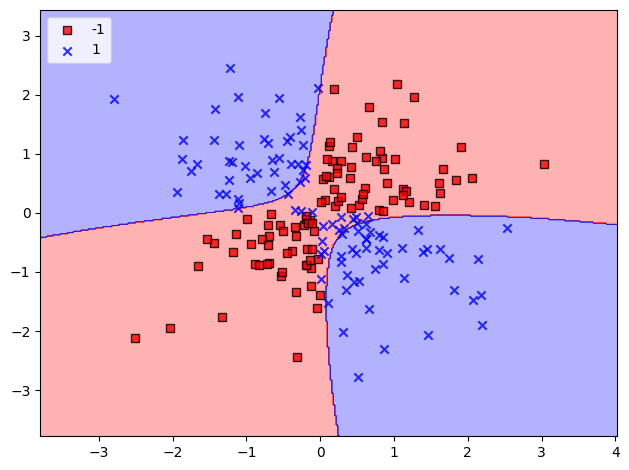

In [37]:
from sklearn.svm import SVC
svm = SVC(
    # Одним из самых широко применяемых ядер является ядро на основе
    # радиалыюй базисиой фуикции (Radial Basis Function - RBF),
    # которое называют просто гауссовым ядром:
    kernel='rbf',
    random_state=1,
    gamma=0.10,
    C=10.0
)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_14.png', dpi=300)
plt.show()

In [40]:
print_aligned_dict(svm.get_params())

                        C: 10.0
               break_ties: false
               cache_size: 200
             class_weight: null
                    coef0: 0.0
  decision_function_shape: ovr
                   degree: 3
                    gamma: 0.1
                   kernel: rbf
                 max_iter: -1
              probability: false
             random_state: 1
                shrinking: true
                      tol: 0.001
                  verbose: false


<ipython-input-11-5347af230dfc>:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


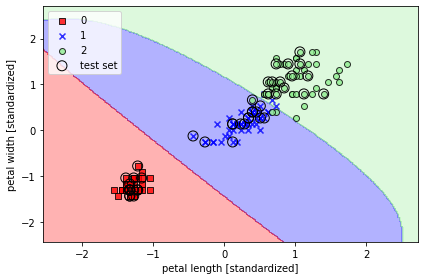

In [ ]:
from sklearn.svm import SVC
svm = SVC(
    kernel='rbf',
    random_state=1,
    gamma=0.2,
    C=1.0
)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_15.png', dpi=300)
plt.show()

<ipython-input-11-5347af230dfc>:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


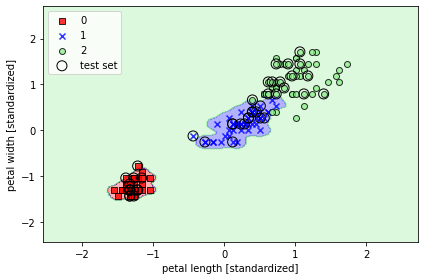

In [ ]:
from sklearn.svm import SVC
svm = SVC(
    kernel='rbf',
    random_state=1,
    gamma=100.0,
    C=1.0
)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_16.png', dpi=300)
plt.show()

<br>
<br>

# Decision tree learning

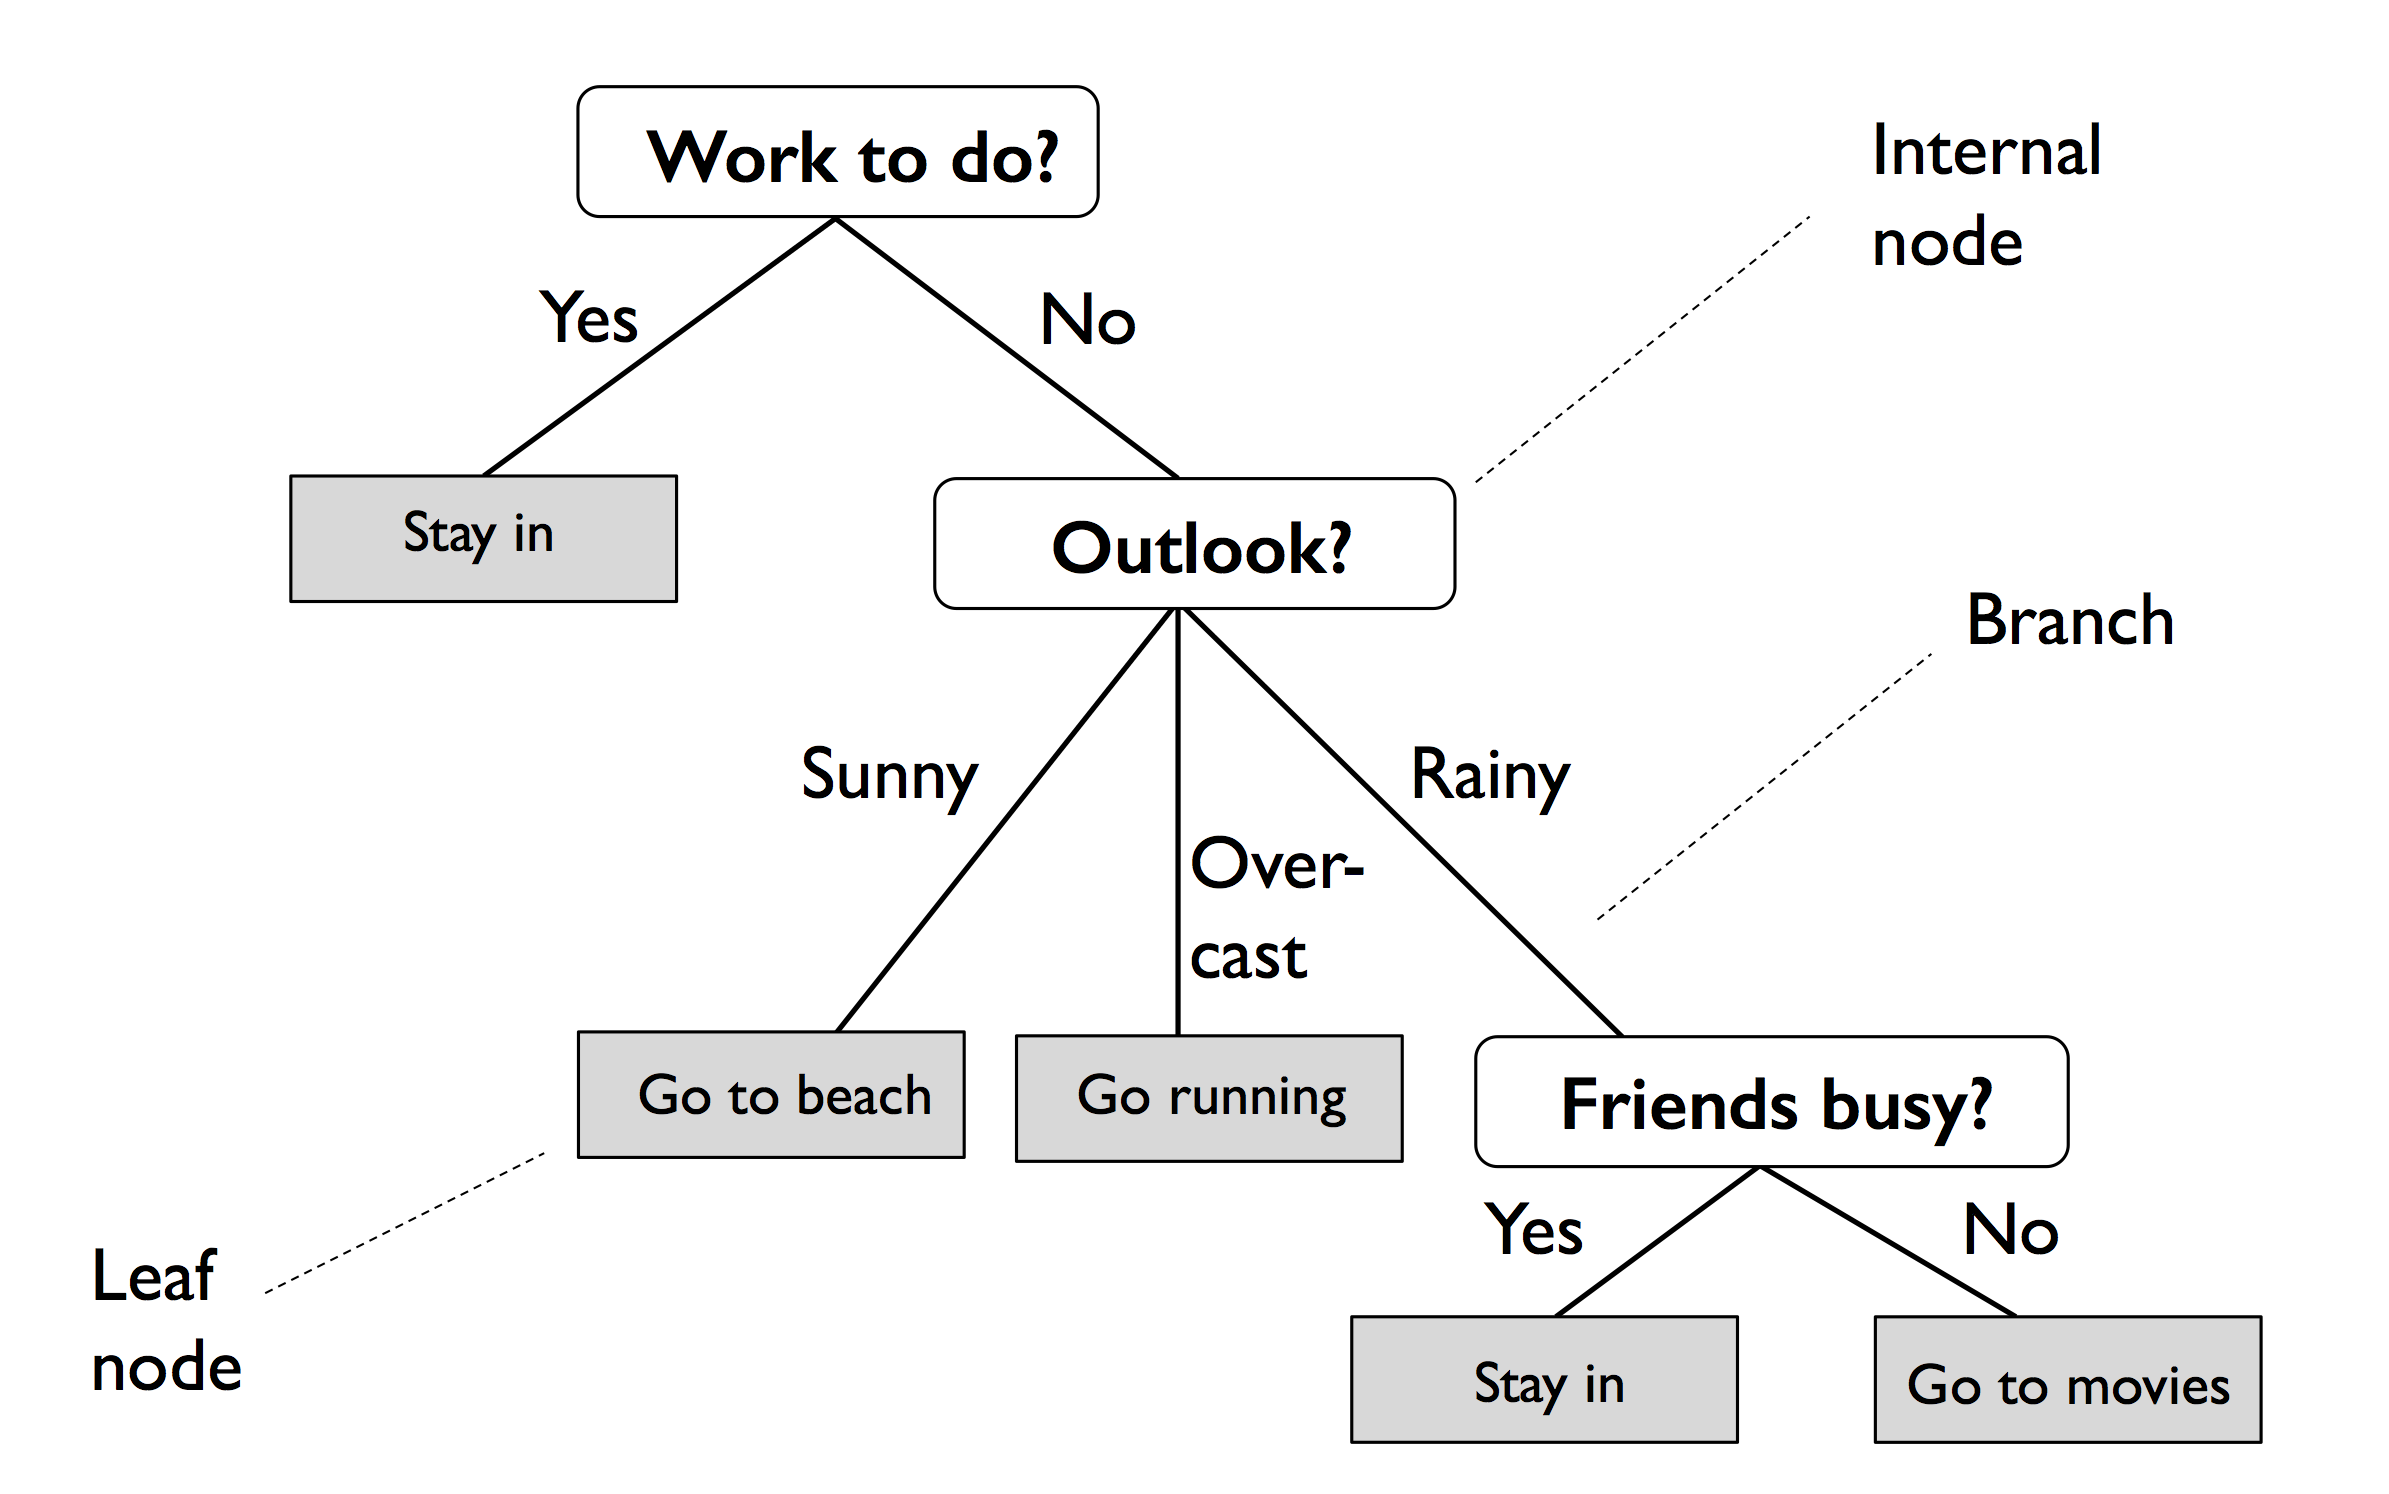

In [ ]:
Image(filename='images/03_17.png', width=500)

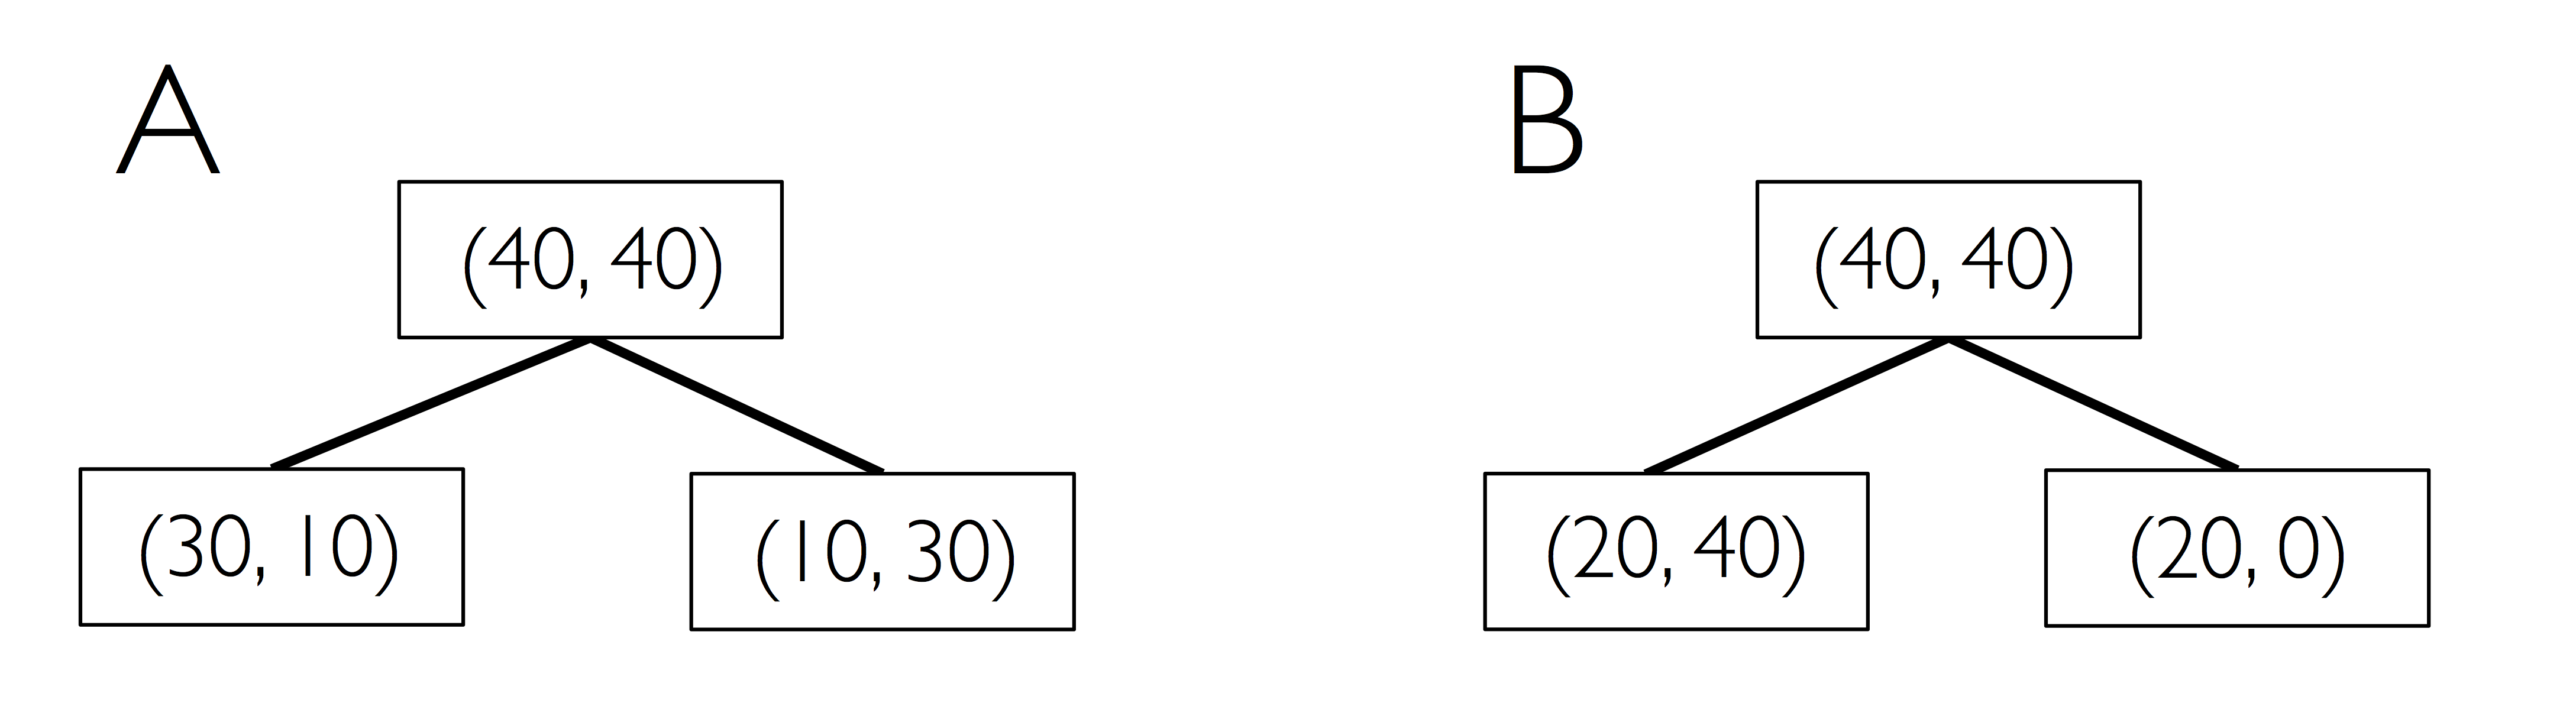

In [ ]:
Image(filename='images/03_18.png', width=500)

<br>
<br>

## Maximizing information gain - getting the most bang for the buck

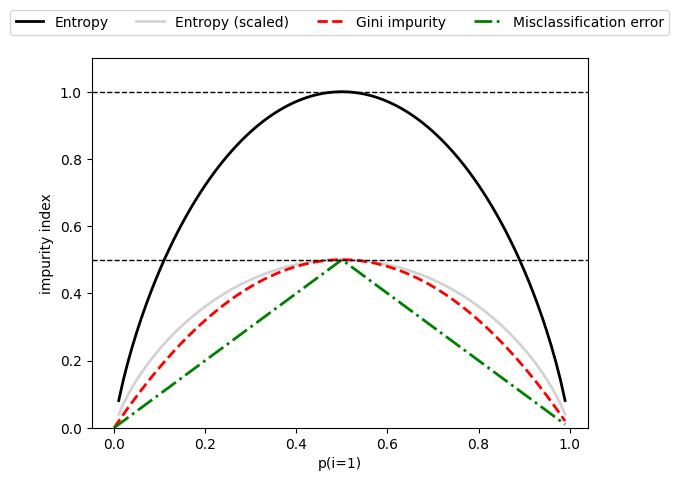

In [38]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)',
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
#plt.savefig('images/03_19.png', dpi=300, bbox_inches='tight')
plt.show()

<br>
<br>

## Building a decision tree

/tmp/ipython-input-251/1601950096.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/tmp/ipython-input-251/1601950096.py:42: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


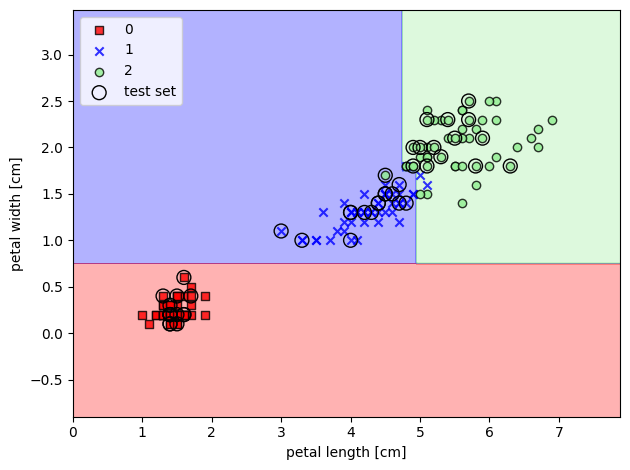

In [39]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(
    criterion='gini', # {“gini”, “entropy”, “log_loss”}, default=”gini”
    max_depth=4,
    random_state=1
)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

In [41]:
print_aligned_dict(tree_model.get_params())

                 ccp_alpha: 0.0
              class_weight: null
                 criterion: gini
                 max_depth: 4
              max_features: null
            max_leaf_nodes: null
     min_impurity_decrease: 0.0
          min_samples_leaf: 1
         min_samples_split: 2
  min_weight_fraction_leaf: 0.0
             monotonic_cst: null
              random_state: 1
                  splitter: best


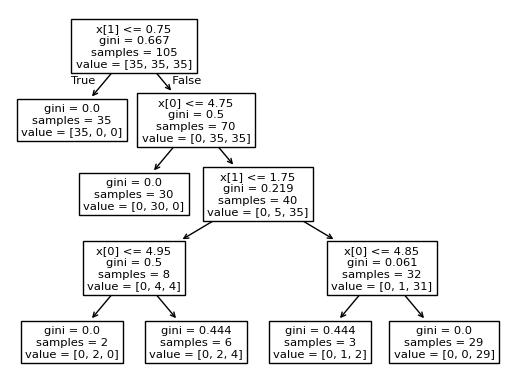

In [42]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

<br>
<br>

In [43]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                           filled=True,
                           rounded=True,
                           class_names=['Setosa',
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length',
                                          'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

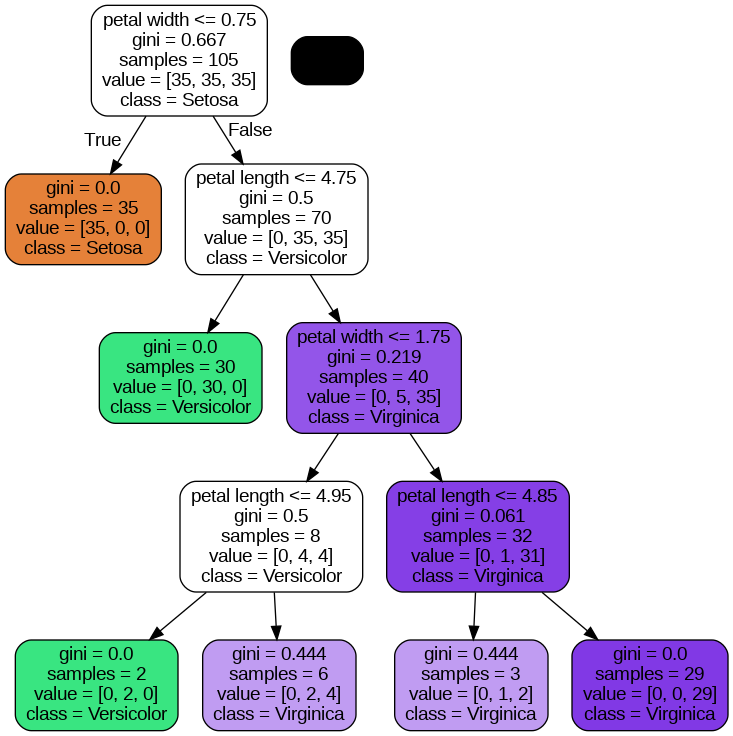

In [47]:
from IPython.display import Image
%matplotlib inline

Image(filename='/content/tree.png', width=600)

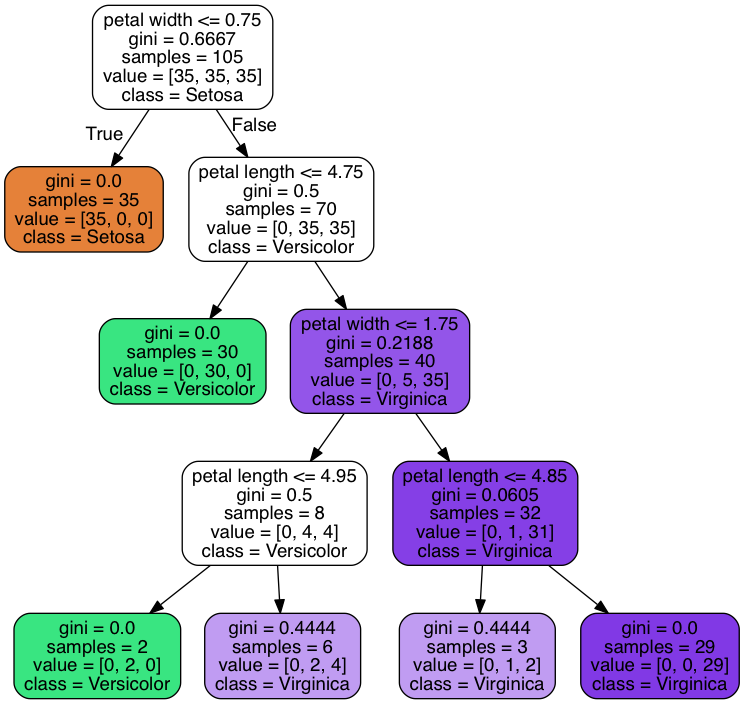

In [ ]:
Image(filename='images/03_21.png', width=600)

<br>
<br>

## Combining weak to strong learners via random forests

/tmp/ipython-input-251/1601950096.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/tmp/ipython-input-251/1601950096.py:42: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


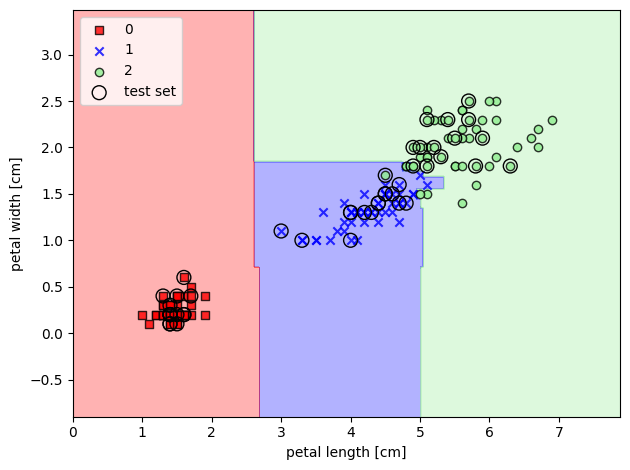

In [48]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(
    criterion='gini',
    n_estimators=25, # The number of trees in the forest.
    random_state=1,
    n_jobs=2
)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined,
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_22.png', dpi=300)
plt.show()

In [49]:
print_aligned_dict(forest.get_params())

                 bootstrap: true
                 ccp_alpha: 0.0
              class_weight: null
                 criterion: gini
                 max_depth: null
              max_features: sqrt
            max_leaf_nodes: null
               max_samples: null
     min_impurity_decrease: 0.0
          min_samples_leaf: 1
         min_samples_split: 2
  min_weight_fraction_leaf: 0.0
             monotonic_cst: null
              n_estimators: 25
                    n_jobs: 2
                 oob_score: false
              random_state: 1
                   verbose: 0
                warm_start: false


<br>
<br>

# K-nearest neighbors - a lazy learning algorithm

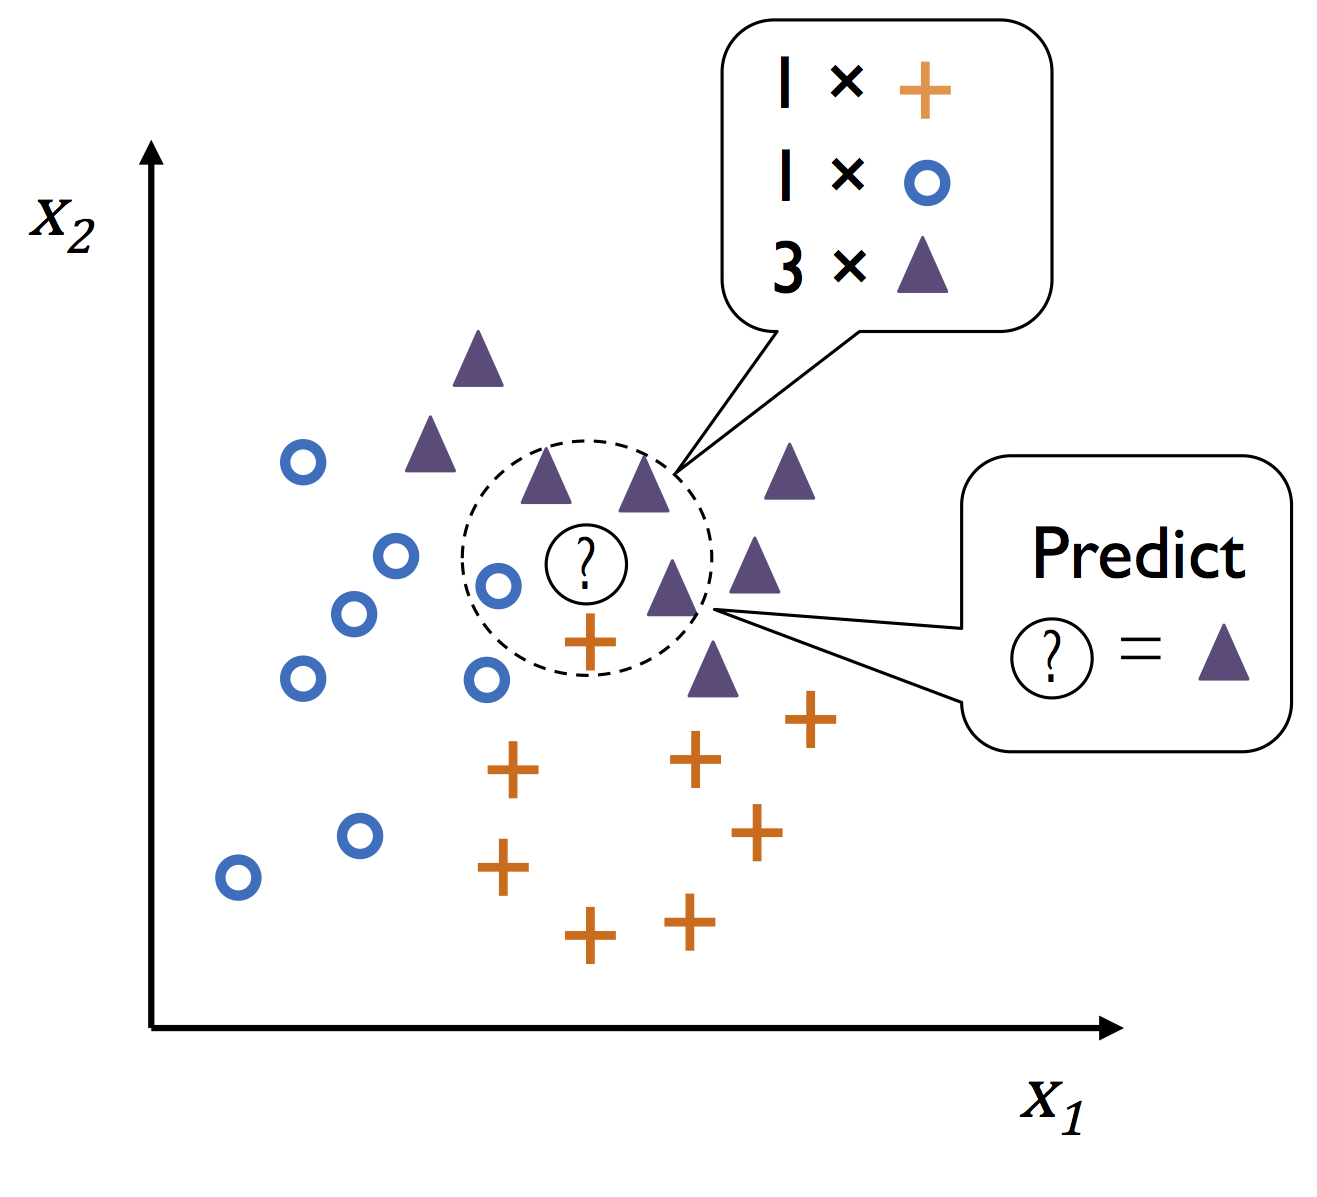

In [ ]:
Image(filename='images/03_23.png', width=400)

/tmp/ipython-input-251/1601950096.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/tmp/ipython-input-251/1601950096.py:42: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


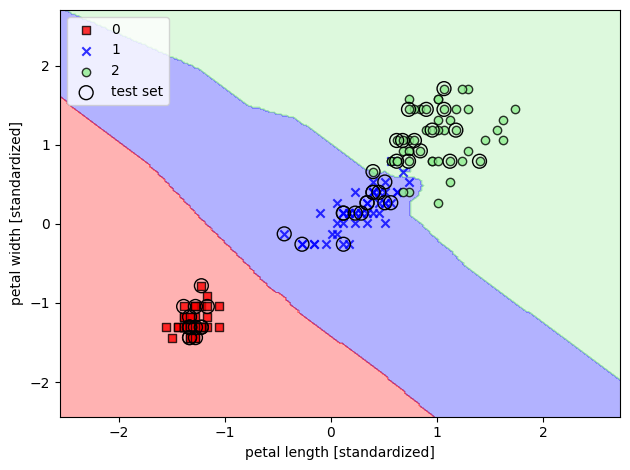

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors=5,
    p=2,
    # https://scikit-learn.org/0.19/modules/generated/sklearn.neighbors.DistanceMetric.html
    metric='minkowski'
)
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()

In [51]:
print_aligned_dict(knn.get_params())

      algorithm: auto
      leaf_size: 30
         metric: minkowski
  metric_params: null
         n_jobs: null
    n_neighbors: 5
              p: 2
        weights: uniform


<br>
<br>

# Summary

...

---

Readers may ignore the next cell.

In [ ]:
! python ../.convert_notebook_to_script.py --input ch03.ipynb --output ch03.py

[NbConvertApp] Converting notebook ch03.ipynb to script
[NbConvertApp] Writing 20742 bytes to ch03.py


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

/tmp/ipython-input-1409858949.py:22: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  'timestamp': pd.date_range('2023-01-01', periods=n_points, freq='T'),


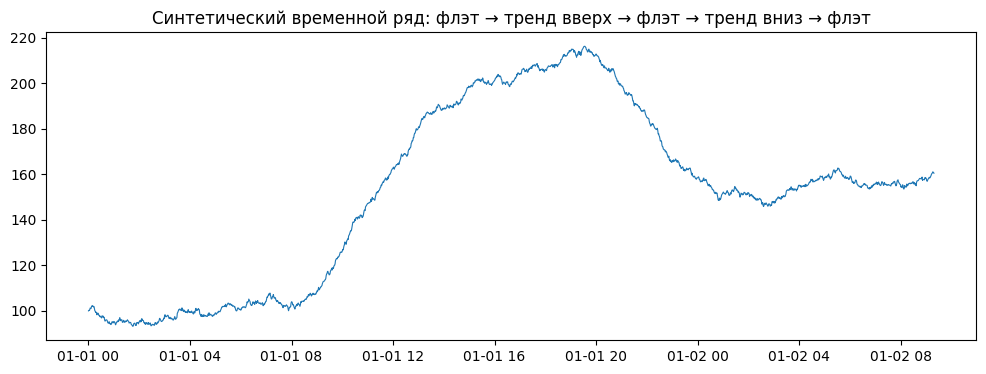

In [ ]:
# Шаг 1: Генерация синтетического временного ряда

np.random.seed(42)
n_points = 2000

# Базовый случайный блуждающий процесс
price = [100]
for i in range(1, n_points):
    # Иногда добавляем тренд
    if 500 <= i < 800:
        drift = 0.3  # тренд вверх
    elif 1200 <= i < 1500:
        drift = -0.25  # тренд вниз
    else:
        drift = 0.0  # флэт

    change = drift + np.random.normal(0, 0.5)
    price.append(price[-1] + change)

# Создаём DataFrame
df = pd.DataFrame({
    'timestamp': pd.date_range('2023-01-01', periods=n_points, freq='T'),
    'price': price
})
df.set_index('timestamp', inplace=True)

# Визуализация
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['price'], linewidth=0.8)
plt.title("Синтетический временной ряд: флэт → тренд вверх → флэт → тренд вниз → флэт")
plt.show()

In [ ]:
#
# Шаг 2: Определим целевую переменную
# Будем смотреть на изменение цены за следующие 20 минут:

# Горизонт прогноза (в минутах)
horizon = 20

# Рассчитываем будущую доходность
df['future_return'] = df['price'].pct_change(periods=horizon).shift(-horizon)

# Классификация:
# -1: тренд вниз (доходность < -0.5%)
#  0: флэт (|доходность| <= 0.5%)
# +1: тренд вверх (доходность > 0.5%)
threshold = 0.005  # 0.5%

def classify_trend(ret):
    if pd.isna(ret):
        return np.nan
    elif ret > threshold:
        return 1
    elif ret < -threshold:
        return -1
    else:
        return 0

df['target'] = df['future_return'].apply(classify_trend)

In [ ]:
df

,price,future_return,target
timestamp,,,
2023-01-01 00:00:00,100.000000,-0.017130,-1.0
2023-01-01 00:01:00,100.248357,-0.012255,-1.0
2023-01-01 00:02:00,100.179225,-0.012700,-1.0
2023-01-01 00:03:00,100.503069,-0.015545,-1.0
2023-01-01 00:04:00,101.264584,-0.029983,-1.0
...,...,...,...
2023-01-02 09:15:00,160.457254,NaN,NaN
2023-01-02 09:16:00,160.992329,NaN,NaN
2023-01-02 09:17:00,160.979069,NaN,NaN


In [ ]:
#
# Шаг 3: Генерация признаков из окна
# Используем последние 60 минут для предсказания:

def create_features(df, window=60):
    df_feat = df.copy()

    # Лаги цены
    for lag in [1, 5, 10, 30]:
        df_feat[f'price_lag_{lag}'] = df['price'].shift(lag)

    # Скользящие статистики
    rolling = df['price'].rolling(window=window)
    df_feat['ma'] = rolling.mean()
    df_feat['std'] = rolling.std()
    df_feat['min'] = rolling.min()
    df_feat['max'] = rolling.max()

    # Наклон (тренд за окно)
    def rolling_slope(series):
        if len(series) < 2:
            return np.nan
        x = np.arange(len(series))
        y = series.values
        slope, _ = np.polyfit(x, y, 1)
        return slope

    df_feat['slope'] = df['price'].rolling(window=window).apply(rolling_slope, raw=False)

    # Волатильность
    df_feat['volatility'] = df['price'].pct_change().rolling(window=window).std()

    return df_feat

df_features = create_features(df, window=60)

In [ ]:
df_features.head(20)

,price,future_return,target,price_lag_1,price_lag_5,price_lag_10,price_lag_30,ma,std,min,max,slope,volatility
timestamp,,,,,,,,,,,,,
2023-01-01 00:00:00,100.000000,-0.017130,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:01:00,100.248357,-0.012255,-1.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:02:00,100.179225,-0.012700,-1.0,100.248357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:03:00,100.503069,-0.015545,-1.0,100.179225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:04:00,101.264584,-0.029983,-1.0,100.503069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:05:00,101.147507,-0.031552,-1.0,101.264584,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:06:00,101.030439,-0.029880,-1.0,101.147507,100.248357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:07:00,101.820045,-0.043056,-1.0,101.030439,100.179225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:08:00,102.203763,-0.044810,-1.0,101.820045,100.503069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#
# Шаг 4: Подготовка данных для обучения

# Выбираем только строки без NaN
feature_cols = [col
                for col in df_features.columns
                if col not in ['price', 'future_return', 'target']
               ]
X = df_features[feature_cols]
y = df_features['target']

# Удаляем строки с пропусками
mask = ~(X.isna().any(axis=1) | y.isna())
X = X[mask]
y = y[mask]

print(f"Форма X: {X.shape}")
print(f"Распределение классов:\n{y.value_counts().sort_index()}")

Форма X: (1920, 10)
Распределение классов:
target
-1.0    657
 0.0    294
 1.0    969
Name: count, dtype: int64


In [ ]:
X

,price_lag_1,price_lag_5,price_lag_10,price_lag_30,ma,std,min,max,slope,volatility
timestamp,,,,,,,,,,
2023-01-01 01:00:00,94.872587,94.815530,94.363152,97.177797,97.748633,2.550415,93.994192,102.240306,-0.138684,0.004638
2023-01-01 01:01:00,95.360360,95.281170,94.525194,96.876943,97.663173,2.551142,93.994192,102.240306,-0.138755,0.004623
2023-01-01 01:02:00,95.120772,94.861561,94.332653,97.803082,97.577319,2.551712,93.994192,102.240306,-0.138810,0.004623
2023-01-01 01:03:00,95.027943,94.706955,93.994192,97.796334,97.476847,2.553240,93.994192,102.240306,-0.138938,0.004634
2023-01-01 01:04:00,94.474775,94.872587,94.300030,97.267478,97.353715,2.545609,93.876672,102.240306,-0.138420,0.004544
...,...,...,...,...,...,...,...,...,...,...
2023-01-02 08:55:00,157.715114,158.463212,158.123296,156.125785,156.054279,1.304146,153.492944,158.759990,0.061029,0.003614
2023-01-02 08:56:00,157.705760,158.759990,158.168087,155.940979,156.073127,1.317051,153.492944,158.759990,0.063971,0.003610
2023-01-02 08:57:00,157.511501,157.289796,158.069418,156.129530,156.107907,1.342047,153.492944,158.759990,0.067104,0.003620


In [ ]:
y

,target
timestamp,
2023-01-01 01:00:00,0.0
2023-01-01 01:01:00,0.0
2023-01-01 01:02:00,0.0
2023-01-01 01:03:00,1.0
2023-01-01 01:04:00,1.0
...,...
2023-01-02 08:55:00,1.0
2023-01-02 08:56:00,1.0
2023-01-02 08:57:00,1.0


In [ ]:
#
# Шаг 5: Обучение модели с временной валидацией

# Инициализация
tscv = TimeSeriesSplit(n_splits=5)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Храним результаты
all_y_true = []
all_y_pred = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

# Оценка качества
print("\nОтчёт о классификации:")
print(classification_report(all_y_true, all_y_pred, target_names=['Тренд ↓', 'Флэт', 'Тренд ↑']))


Отчёт о классификации:
              precision    recall  f1-score   support

     Тренд ↓       0.30      0.37      0.33       557
        Флэт       0.16      0.06      0.08       229
     Тренд ↑       0.49      0.50      0.50       814

    accuracy                           0.39      1600
   macro avg       0.32      0.31      0.30      1600
weighted avg       0.38      0.39      0.38      1600



In [ ]:
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

In [ ]:
#
# Шаг 6: Анализ важности признаков

importances = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("\nТоп-5 важных признаков:")
print(importances.head())


Топ-5 важных признаков:
slope           0.211888
ma              0.126946
min             0.103961
price_lag_30    0.089248
price_lag_1     0.087412
dtype: float64
